# Ficha de Trabalho 1

In [1]:
#imports
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.integrate import ode, odeint
from scipy.optimize import basinhopping, root, fsolve
import numdifftools as nd
import math
from sympy import *
from typing import Union

Criar o modelo para a bactéria BL21 (Descontínuo / *batch*)

In [2]:
def bl21(t: Union[int,float], Y: Union[list,tuple], params: Union[list,tuple]) -> list:
    """
    Modelo para a estirpe BL21 (modo batch) 
    
    :param t: Tempo
    :param Y: Condições iniciais
    :param params: Parâmetros [biomassa, substrato, acetato, proteína]
    :return: K * phi - (D * variáveis) + zeros
    """
    X, S, A, P = Y
    k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,V = params
    
    u1= 0.3 * (S/(0.2+S))
    u2= 0.6 * (S/(0.2+S)) 
    u3= 0.2 * (A/(0.5+A))
    
    derivs = [u1*X + u2*X + u3*X, #dX/dt
              -k1*u1*X - k2*u2*X, #dS/dt
              k3*u2*X - k4*u3*X,  #dA/dt
              k11*u1*X]           #dP/dt
    
    return derivs

## a)-b)

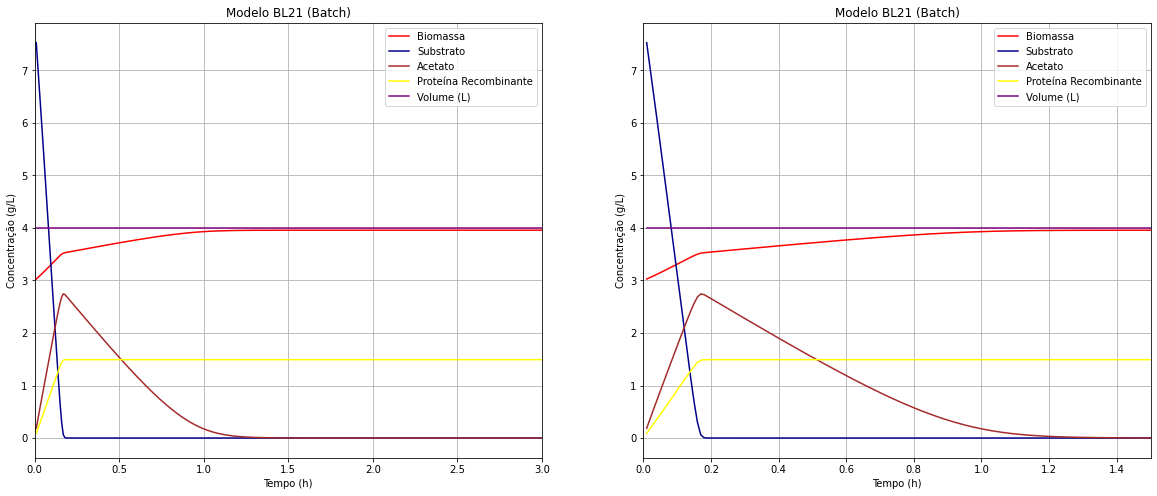

In [3]:
# Condições iniciais
# Y = [X, S, A, P]
y0 = [3., 8., 0., 0.]

# Parâmetros
# params = [k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, k11, V]
params = [3.164, 25.22, 10.9, 6.382, 1.074, 11.89, 6.098, 1.283, 19.01, 6.576, 10, 4]

t0 = 0    # Tempo inicial
t1 = 3    # Tempo final
dt = 0.01 # Passo

# ode
res = ode(bl21).set_integrator("lsoda", method="bdf", lband=0)
res.set_initial_value(y0, t0).set_f_params(params)

# Listas para guardar os valores teóricos ao longo do tempo
x, s, a, p, T = [], [], [], [], []

# Resolução da ode para cada passo de tempo
while res.successful() and res.t < t1:
    result = res.integrate(res.t + dt)
    x, s, a, p, T = x + [result[0]], s + [result[1]], a + [result[2]], p + [result[3]], T + [res.t]


# Criar os gráficos

# xlim = 3
fig, ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(20)
ax[0].plot(T, x, label='Biomassa', color='red')
ax[0].plot(T, s, label='Substrato', color='darkblue')
ax[0].plot(T, a, label='Acetato', color='brown')
ax[0].plot(T, p, label='Proteína Recombinante', color='yellow')
ax[0].plot(T, [4] * len(T), label='Volume (L)', color='purple')
ax[0].legend(loc='best')
ax[0].set_xlabel('Tempo (h)')
ax[0].set_ylabel('Concentração (g/L)')
ax[0].set_title('Modelo BL21 (Batch)')
ax[0].set_xlim(0., 3.0)
ax[0].grid()

# xlim = 1.5
fig.set_figheight(8)
fig.set_figwidth(20)
ax[1].plot(T, x, label='Biomassa', color='red')
ax[1].plot(T, s, label='Substrato', color='darkblue')
ax[1].plot(T, a, label='Acetato', color='brown')
ax[1].plot(T, p, label='Proteína Recombinante', color='yellow')
ax[1].plot(T, [4] * len(T), label='Volume (L)', color='purple')
ax[1].legend(loc='best')
ax[1].set_xlabel('Tempo (h)')
ax[1].set_ylabel('Concentração (g/L)')
ax[1].set_title('Modelo BL21 (Batch)')
ax[1].set_xlim(0., 1.5)
plt.grid()
plt.show()

## c)-d)

Criar o modelo para a bactéria BL21 (Semi-contínuo / *fed-batch*)

In [4]:
def bl21_FB(t: Union[int,float], Y: Union[list,tuple], params: Union[list,tuple]) -> list:
    """
    
    Modelo para a estirpe BL21 (modo fed-batch)
    
    :param t: Tempo
    :param Y: Condições iniciais
    :param params: Parâmetros [biomassa, substrato, acetato, proteína, volume]
    :return: K * phi - (D * variáveis) + zeros
    """
    X, S, A, P, V = Y
    k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, k11, V0, Fe, Se = params
    
    u1= 0.3 * (S/(0.2+S))
    u2= 0.6 * (S/(0.2+S)) 
    u3= 0.2 * (A/(0.5+A))
    D = Fe / V

    reactions = [u1*X + u2*X + u3*X - D*X,   #dX/dt
            -k1*u1*X - k2*u2*X - D*S + D*Se, #dS/dt
            k3*u2*X - k4*u3*X - D*A,         #dA/dt
            k11*u1*X - D*P,                  #dP/dt
            Fe]                              #dV/dt
    
    return reactions

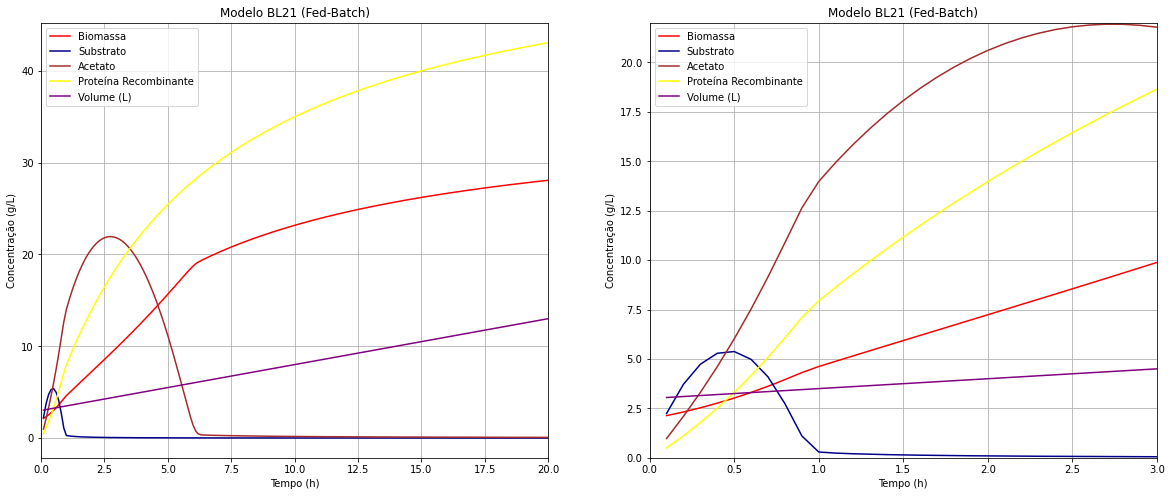

In [5]:
# Condições iniciais
# Y = [X, S, A, P, V]
y0 = [2., 0., 0., 0., 3.]

# Parâmetros
# params = [k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, k11, V0, Fe, Se]
params = [3.164, 25.22, 10.9, 6.382, 1.074, 11.89, 6.098, 1.283, 19.01, 6.576, 10, 3, 0.5, 300]


t0 = 0   #Tempo inicial
t1 = 20  #Tempo final
dt = 0.1 #Passo
#dt = 0.5

# ode
res = ode(bl21_FB).set_integrator("lsoda", method="bdf", lband=0)
res.set_initial_value(y0, t0).set_f_params(params)

# Listas para guardar os valores teóricos ao longo do tempo
x, s, a, p, v, T= [], [], [], [], [], []

# Resolução da ode para cada passo de tempo
while res.successful() and res.t < t1:
    result = res.integrate(res.t+dt)
    x, s, a, p, v, T = x+[result[0]], s+[result[1]], a+[result[2]], p+[result[3]], v+[result[4]], T+[res.t]


# using the storing variables to plot
x = np.array([y0[0]] + x)
s = np.array([y0[1]] + s)
a = np.array([y0[2]] + a)
p = np.array([y0[3]] + p)
v = np.array([y0[4]] + v)
T = np.array([0] + T)

df_FB = pd.DataFrame({'Tempo': T,
                      'X': x,
                      'S': s,
                      'A': a,
                      'P': p,
                      'V': v})
FB_exc= pd.ExcelWriter('FB_exc.xlsx', engine='xlsxwriter') 
df_FB.to_excel(FB_exc, sheet_name='Folha 1', index=False)
FB_exc.save()


# Criar os gráficos

# xlim = 20
fig, ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(20)
ax[0].plot(T, x, label='Biomassa', color='red')
ax[0].plot(T, s, label='Substrato', color='darkblue')
ax[0].plot(T, a, label='Acetato', color='brown')
ax[0].plot(T, p, label='Proteína Recombinante', color='yellow')
ax[0].plot(T, v, label='Volume (L)', color='purple')
ax[0].legend(loc='best')
ax[0].set_xlabel('Tempo (h)')
ax[0].set_ylabel('Concentração (g/L)')
ax[0].set_title('Modelo BL21 (Fed-Batch)')
ax[0].set_xlim([0., 20.0])
ax[0].grid()

# xlim = 3, ylim = 22
ax[1].plot(T, x, label='Biomassa', color='red')
ax[1].plot(T, s, label='Substrato', color='darkblue')
ax[1].plot(T, a, label='Acetato', color='brown')
ax[1].plot(T, p, label='Proteína Recombinante', color='yellow')
ax[1].plot(T, v, label='Volume (L)', color='purple')
ax[1].legend(loc='best')
ax[1].set_xlabel('Tempo (h)')
ax[1].set_ylabel('Concentração (g/L)')
ax[1].set_title('Modelo BL21 (Fed-Batch)')
ax[1].set_ylim([0., 22])
ax[1].set_xlim([0., 3.0])
ax[1].grid()


## e) 

Criar modelo para a bactéria JM109 (semi-contínuo / *fed-batch*)

In [6]:
def jm109(t: Union[int,float], Y: Union[list,tuple], params: Union[list,tuple]) -> list:
    """
    Modelo para a estirpe JM109 (modo fed-batch) 
    
    :param t: Tempo
    :param Y: Condições iniciais
    :param params: Parâmetros [biomassa, substrato, acetato, proteína, volume]
    :return: K * phi - (D * variáveis) + zeros
    """
    X, S, A, P, V = Y
    k1, umax1, ks1 = params
    
    u1= umax1 * (S/(ks1+S))
    u2= 0.6 * (S/(0.2+S)) 
    u3= 0.2 * (A/(0.5+A))
    D = 0.5 / V

    reactions = [u1*X + u2*X + u3*X - D*X,       #dX/dt
            -k1*u1*X - 25.22*u2*X - D*S + D*300, #dS/dt
            10.90*u2*X - 6.382*u3*X - D*A,       #dA/dt
            10.0*u1*X - D*P,                     #dP/dt
            0.5]                                 #dV/dt
    
    return reactions

Criar função para estimação dos parâmetros

In [7]:
def estimate(params: Union[list, tuple]) -> float:
    """
    Função para calcular a diferença entre os valores experimentais e estimados,
    podendo ser usado como a função objetivo para a ode
    
    :param params: Parâmetros [biomassa, substrato, acetato, proteína, volume]
    :return: Erro entre dados experimentais e estimados, i.e. difS + difX + difA + difV
    """
    global model
    global Y_estimate
    
    # Valores iniciais das variáveis
    # Y = [X, S, A, P, V]
    Y = [[2., 0., 0., 0., 3.]]
    
    # ode
    res = ode(model).set_integrator("lsoda", method="bdf", lband=0)
    res.set_initial_value(y0, t0).set_f_params(params)

    # Resolução da ode para cada passo de tempo
    while res.successful() and res.t < t1:
        result = res.integrate(res.t+dt)
        Y.append(list(result))

    # Remover a coluna referente à proteína recombinante (P) uma vez que não se encontra nos valores experimentais
    for i in range(len(Y)):
        Y[i].pop(3)
    
    # Redefinir o Y_estimate para Y quando o sistema ode for resolvido com sucesso
    # Caso contrário, usa os valores da chamada anterior da função
    if len(dados_exp) == len(Y):
        Y_estimate = Y
        
    # Obtenção do erro (usando o método "Root-sum-squared" (RSS)
    # para as diferenças entre os valores estimados e os experimentais)
    dif = np.subtract(Y_estimate, dados_exp)
    pot = np.power(dif, 2)
    errors = pot.sum(axis = 0)
    sum_errors = math.sqrt(errors.sum())
    
    return sum_errors

In [8]:
class Bounds(object):
    """
    Define os limites do "Simulated Annealing"
    """
    def __init__(self, LB: Union[list,tuple]=None, UB: Union[list,tuple]=None):

        if LB is None:
            LB = [0, 0, 0]

        if UB is None:
            UB = [4, 4, 4]

        self.lower_bound = np.array(LB)
        self.upper_bound = np.array(UB)

        
    def __call__(self, **kwargs) -> bool:

        x = kwargs["x_new"]

        tmax = bool(np.all(x <= self.upper_bound))
        tmin = bool(np.all(x >= self.lower_bound))

        return tmax and tmin

In [9]:
# Leitura dos dados experimentais
dados_exp = pd.read_excel('dados_exp_1.xlsx').to_numpy().tolist()

# Criar lista de todos os dados temporais
t = [i[0] for i in dados_exp]

# Remover os dados temporais do dataframe relativo aos dados experimentais 
for i in range(len(dados_exp)):
    dados_exp[i].pop(0)

t0 = t[0]        #Tempo inicial
t1 = t[-1]       #Tempo final
dt = t[1] - t[0] #Passo

# Criação de uma lista para guardar os valores estimados
# Y = [X, S, A, P, V]
Y_estimate = [[0,0,0,0,0] for i in range(len(t))]

# Bounds
LB = [0, 0, 0]
UP = [5, 1, 1]
bounds = Bounds(LB, UP)

# Modelo
model = jm109

# Parâmetros experimentais inicias a testar -> k1, umax1, ks1
init_params = [3.164, 0.3, 0.2]

# Simulated Annealing -> processo de minimização do erro, com 200 iterações
minimizer_kwargs = {"method": "BFGS"}
value_error = basinhopping(estimate, init_params, minimizer_kwargs=minimizer_kwargs, niter=200, 
                           accept_test=bounds, seed=1)
print(value_error)


C:\Users\rober\anaconda3\lib\site-packages\scipy\integrate\_ode.py:1352: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,
C:\Users\rober\anaconda3\lib\site-packages\scipy\integrate\_ode.py:1352: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,
C:\Users\rober\anaconda3\lib\site-packages\scipy\integrate\_ode.py:1352: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,
C:\Users\rober\anaconda3\lib\site-packages\scipy\integrate\_ode.py:1352: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,
C:\Users\rober\anaconda3\lib\site-packages\scipy\integrate\_ode.py:1352: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  warn

                        fun: 46.910971993380564
 lowest_optimization_result:       fun: 46.910971993380564
 hess_inv: array([[ 2.43097905e-14, -1.45604810e-13,  6.26816320e-14],
       [-1.45604810e-13,  8.91661708e-13, -3.98943135e-13],
       [ 6.26816320e-14, -3.98943135e-13,  1.89884088e-13]])
      jac: array([5071.26263618, 2041.65777349, 5095.11192989])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 208
      nit: 5
     njev: 49
   status: 2
  success: False
        x: array([3.00443302, 0.0112703 , 0.45012482])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 187
                       nfev: 39117
                        nit: 200
                       njev: 9240
                          x: array([3.00443302, 0.0112703 , 0.45012482])


In [10]:
print(value_error.x)

[3.00443302 0.0112703  0.45012482]


In [16]:
# Grear valores para gráfico de comparação entre dados experimentais e dados do modelo JM109 (otimizado)

# Parâmetros minimizantes (aprox.) -> k1, umax1, ks1
final_params = value_error.x #[3.00443302, 0.0112703 , 0.45012482]

# Valores iniciais das variáveis
# Y = [X, S, A, P, V]
y0=[2., 0., 0., 0., 3.]

# ode
res = ode(model).set_integrator("lsoda", method="bdf", lband=0)
res.set_initial_value(y0, t0).set_f_params(final_params)

# Listas para guardar os valores teóricos ao longo do tempo
x, s, a, p, v, T= [], [], [], [], [], []

# Resolução da ode para cada passo de tempo
while res.successful() and res.t < t1:
    result = res.integrate(res.t+dt)
    x, s, a, p, v, T = x+[result[0]], s+[result[1]], a+[result[2]], p+[result[3]], v+[result[4]], T+[res.t]


# Adicionar parâmetros iniciais às listas de dados gerados
x = np.array([y0[0]] + x)
s = np.array([y0[1]] + s)
a = np.array([y0[2]] + a)
p = np.array([y0[3]] + p)
v = np.array([y0[4]] + v)
T = np.array([0] + T)
    

# Gravar os resultados finais num ficheiro Excel para facilitar a posterior criação do gráfico
    
# Criar dataframe no "Pandas"
df_FB_EST = pd.DataFrame({'Tempo': T,
                          'X': x,
                          'S': s,
                          'A': a,
                          'P': p,
                          'V': v})

# Guardar dataframe num ficheiro excel
FB_exc_Est= pd.ExcelWriter('FB_exc_Est.xlsx', engine='xlsxwriter') 
df_FB_EST.to_excel(FB_exc_Est, sheet_name='Folha 1', index=False)
FB_exc_Est.save()
        

In [17]:
# Grear valores para gráfico de comparação entre dados experimentais e dados do modelo BL21 inicial

# Condições iniciais
# Y = [X, S, A, P, V]
y0 = [2., 0., 0., 0., 3.]

# Parâmetros
# params = [k1, k2, k3, k4, k5, k6, k7, k8, k9, k10, k11, V0, Fe, Se]
params = [3.164, 25.22, 10.9, 6.382, 1.074, 11.89, 6.098, 1.283, 19.01, 6.576, 10, 3, 0.5, 300]

t0 = 0   #Tempo inicial
t1 = 20  #Tempo final
dt = 0.5 #Passo

# ode
res = ode(bl21_FB).set_integrator("lsoda", method="bdf", lband=0)
res.set_initial_value(y0, t0).set_f_params(params)

# Listas para guardar os valores teóricos ao longo do tempo
x, s, a, p, v, T= [], [], [], [], [], []

# Resolução da ode para cada passo de tempo
while res.successful() and res.t < t1:
    result = res.integrate(res.t+dt)
    x, s, a, p, v, T = x+[result[0]], s+[result[1]], a+[result[2]], p+[result[3]], v+[result[4]], T+[res.t]


# Adicionar parâmetros iniciais às listas de dados gerados
x = np.array([y0[0]] + x)
s = np.array([y0[1]] + s)
a = np.array([y0[2]] + a)
p = np.array([y0[3]] + p)
v = np.array([y0[4]] + v)
T = np.array([0] + T)


# Gravar os resultados finais num ficheiro Excel para facilitar a posterior criação do gráfico

# Criar dataframe no "Pandas"
df_FB = pd.DataFrame({'Tempo': T,
                      'X': x,
                      'S': s,
                      'A': a,
                      'P': p,
                      'V': v})

# Guardar dataframe num ficheiro excel
FB_exc= pd.ExcelWriter('FB_exc.xlsx', engine='xlsxwriter') 
df_FB.to_excel(FB_exc, sheet_name='Folha 1', index=False)
FB_exc.save()

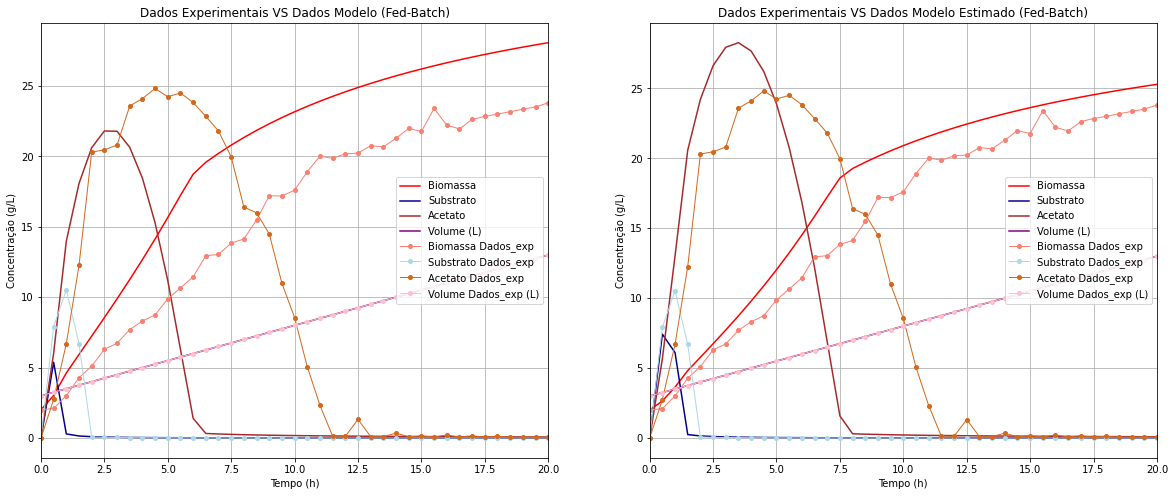

In [18]:
# Guardar valores experimentais em listas
dados_exp= pd.read_excel('dados_exp_1.xlsx')
xe = dados_exp['X'].tolist()
se = dados_exp['S'].tolist()
ae = dados_exp['A'].tolist()
ve = dados_exp['V'].tolist()
T = dados_exp['Tempo'].tolist()



# Gráfico dos dados experimentais e dados estimados (modelo inicial BL21)

# Guardar valores estimados iniciais em listas
dados_model= pd.read_excel('FB_exc.xlsx')
x = dados_model['X'].tolist()
s = dados_model['S'].tolist()
a = dados_model['A'].tolist()
v = dados_model['V'].tolist()

# Criar gráfico com os valores experimentais e estimados iniciais
fig, ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(10)
ax[0].plot(T, x, label='Biomassa', color='red')
ax[0].plot(T, s, label='Substrato', color='darkblue')
ax[0].plot(T, a, label='Acetato', color='brown')
ax[0].plot(T, v, label='Volume (L)', color='purple')
ax[0].plot(T, xe, 'o-', markersize=4, linewidth=1, label='Biomassa Dados_exp', color='salmon')
ax[0].plot(T, se, 'o-', markersize=4, linewidth=1, label='Substrato Dados_exp', color='lightblue')
ax[0].plot(T, ae, 'o-', markersize=4, linewidth=1, label='Acetato Dados_exp', color='chocolate')
ax[0].plot(T, ve, 'o-', markersize=4, linewidth=1, label='Volume Dados_exp (L)', color='pink')

ax[0].legend(loc='center right')
ax[0].set_xlabel('Tempo (h)')
ax[0].set_ylabel('Concentração (g/L)')
ax[0].set_title('Dados Experimentais VS Dados Modelo (Fed-Batch)')

plt.grid()
# plt.grid()
# plt.show()



# Gráfico dos dados experimentais e dados estimados (modelo otimizado JM109)

# Guardar valores estimados finais em listas
dados_model= pd.read_excel('FB_exc_Est.xlsx')
x = dados_model['X'].tolist()
s = dados_model['S'].tolist()
a = dados_model['A'].tolist()
v = dados_model['V'].tolist()

# Criar gráfico com os valores experimentais e estimados finais
fig.set_figheight(8)
fig.set_figwidth(20)
ax[1].plot(T, x, label='Biomassa', color='red')
ax[1].plot(T, s, label='Substrato', color='darkblue')
ax[1].plot(T, a, label='Acetato', color='brown')
ax[1].plot(T, v, label='Volume (L)', color='purple')
ax[1].plot(T, xe, 'o-', markersize=4, linewidth=1, label='Biomassa Dados_exp', color='salmon')
ax[1].plot(T, se, 'o-', markersize=4, linewidth=1, label='Substrato Dados_exp', color='lightblue')
ax[1].plot(T, ae, 'o-', markersize=4, linewidth=1, label='Acetato Dados_exp', color='chocolate')
ax[1].plot(T, ve, 'o-', markersize=4, linewidth=1, label='Volume Dados_exp (L)', color='pink')
ax[1].legend(loc='center right')
ax[1].set_xlabel('Tempo (h)')
ax[1].set_ylabel('Concentração (g/L)')
ax[1].set_title('Dados Experimentais VS Dados Modelo Estimado (Fed-Batch)')
ax[0].set_xlim([0., 20.0])
ax[1].set_xlim([0., 20.0])
ax[0].grid()
# plt.savefig('DadosExpVSModeloVSEst.png')
plt.show()


## f)

In [20]:
# Valores iniciais das variáveis
# Y = [X, S, A, P, V]
y0 = [2., 0., 0., 0., 3.]


# Parâmetros minimizantes (aprox.) -> k1, umax1, ks1
params=[3.00443302, 0.0112703 , 0.45012482]
k1,umax1,ks1 = params

# Parâmetros k (exceto k1)
k2,k3,k4,k5,k6,k7,k8,k9,k10,k11 = [25.22, 10.9, 6.382, 1.074, 11.89, 6.098, 1.283, 19.01, 6.576, 10]

# Parâmetros umax (exceto umax1)
umax2 = 0.6
umax3 = 0.2

# Parâmetros ks (exceto ks1)
ks2 = 0.2
ks3 = 0.5


# Consider using sympy.symbols to create algebric variables to be used on the derivatives (X, S, k1, ks1, ...)

# Criar símbolos algébricos para as variáveis utilizando a função "symbols" do package SymPy
(X,S,A,V,K1,K2,Umax1,Umax2,Umax3,Ks1,Ks2,Ks3,Fe,Se) = sp.symbols('X,S,A,V,k1,k2,umax1,umax2,\
umax3,Ks1,Ks2,Ks3,Fe,Se', real=True)

# Parâmetros mu
u1 = Umax1 * (S / (Ks1 + S))
u2 = Umax2 * (S / (Ks2 + S))
u3 = Umax3 * (A / (Ks3 + A))

# ODEs relativas a X e S
dxdt = u1*X + u2*X + u3*X - Fe/V*X
dsdt = -K1*u1*X - K2*u2*X - Fe/V*S + Fe/V*Se


# Calcular as derivadas parciais de dX/dt e dS/dt em função de k1, umax1 e ks1, usando a função "diff" do package SymPy
dXk1 = sp.diff(dxdt, K1)
dXks1 = sp.diff(dxdt, Ks1)
dXumax1 = sp.diff(dxdt, Umax1)

dSk1 = sp.diff(dsdt, K1)
dSks1 = sp.diff(dsdt, Ks1)
dSumax1 = sp.diff(dsdt, Umax1)


# Criar funções para substituir incógnitas das funções das derivadas parciais, usando a função "lambdify" do package SymPy
dXk1 = sp.lambdify((), dXk1, "numpy")
dXks1 = sp.lambdify((X, S, Ks1, Umax1), dXks1, "numpy")
dXumax1 = sp.lambdify((X, S, Ks1), dXumax1, "numpy")
dSk1 = sp.lambdify((X, S, Ks1, Umax1), dSk1, "numpy")
dSks1 = sp.lambdify((X, S, Ks1, Umax1, K1), dSks1, "numpy")
dSumax1 = sp.lambdify((X, S, Ks1, K1), dSumax1, "numpy")


t0 = 0    #Tempo inicial
t1 = 20.1 #Tempo final
dt = 0.01 #Passo

# ode
res = ode(jm109).set_integrator("lsoda", method="bdf", lband=0) # nsteps=10000
res.set_initial_value(y0, t0).set_f_params(params)

# Listas para guardar os valores das sensibilidades ao longo do tempo
T,dxk1,dxks1,dxumax1,dsk1,dsks1,dsumax1 = [],[],[],[],[],[],[]

# Resolução da ode para cada passo de tempo
while res.successful() and res.t < t1:
    result = res.integrate(res.t+dt)
    x,s,a,p,v = result
    
    T.append(res.t)
    
    dxk1.append(dXk1())
    dxks1.append(dXks1(x,s,ks1,umax1))
    dxumax1.append(dXumax1(x,s,ks1))
    
    dsk1.append(dSk1(x,s,ks1,umax1))
    dsks1.append(dSks1(x,s,ks1,umax1,k1))
    dsumax1.append(dSumax1(x,s,ks1,k1))

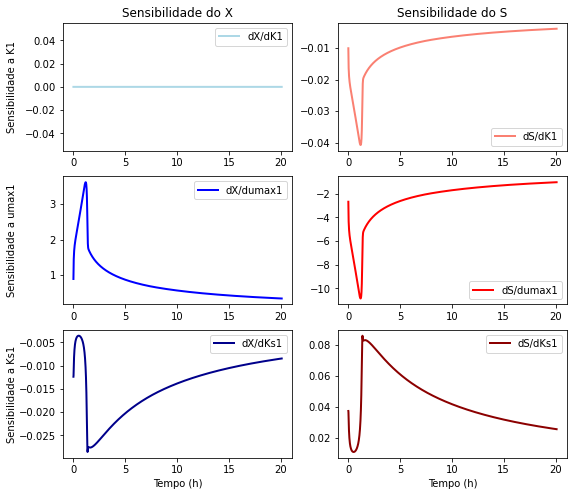

In [21]:
# Criar gráficos das sensibilidades de X em função de k1, umax1 e ks1
fig, ax = plt.subplots(3,2)
fig.set_figheight(8)
fig.set_figwidth(10)
ax[0,0].plot(T, dxk1, linewidth=2, linestyle='solid', label='dX/dK1', color='lightblue')
ax[0,0].set_title('Sensibilidade do X')
ax[0,0].get_yaxis().set_label_coords(-0.20,0.5)
ax[0,0].legend()
ax[0,0].set_ylabel('Sensibilidade a K1')
ax[1,0].get_yaxis().set_label_coords(-0.2,0.5)
ax[1,0].plot(T, dxumax1, linewidth=2, linestyle='solid', label='dX/dumax1', color='blue')
ax[1,0].legend()
ax[1,0].set_ylabel('Sensibilidade a umax1')
ax[2,0].plot(T, dxks1, linewidth=2, linestyle='solid', label='dX/dKs1', color='darkblue')
ax[2,0].legend()
ax[2,0].set_ylabel('Sensibilidade a Ks1')
ax[2,0].get_yaxis().set_label_coords(-0.2,0.5)
ax[2,0].set_xlabel('Tempo (h)')

# Criar gráficos das sensibilidades de S em função de k1, umax1 e ks1
ax[0,1].plot(T, dsk1, linewidth=2, linestyle='solid', label='dS/dK1', color='salmon')
ax[0,1].set_title('Sensibilidade do S')
ax[0,1].legend()
ax[1,1].plot(T, dsumax1, linewidth=2, linestyle='solid', label='dS/dumax1', color='red')
ax[1,1].legend()
ax[2,1].plot(T, dsks1, linewidth=2, linestyle='solid', label='dS/dKs1', color='darkred')
ax[2,1].legend()
ax[2,1].set_xlabel('Tempo (h)')

fig.subplots_adjust(left=0.2, wspace=0.2)

# Gravar gráficos
plt.savefig('Scatter_Sensibilidades.png')
# plt.show()

## g)

In [23]:
def chemostate(x: Union[list,tuple]) -> list:
    """
    Modelo para o quimiostato

    :param y: Variáveis
    :return: Lista com equações do modelo
    """
    X, S, A, P = x
    
    u1= 0.3 * (S/(0.2+S))
    u2= 0.6 * (S/(0.2+S)) 
    u3= 0.2 * (A/(0.5+A))
    
    k1=3.164
    k2= 25.22
    k3= 10.9
    k4= 6.382
    k11= 10 
    V=6 
    Fe=0.5 
    Se=300
    D=Fe/V
    
    return [u1*X + u2*X + u3*X - D*X,         #dX/dt
            -k1*u1*X - k2*u2*X - D*S + D*Se,  #dS/dt
            k3*u2*X - k4*u3*X - D*A,          #dA/dt
            k11*u1*X - D*P]                   #dP/dt


# Cálculo as raízes da função, dado um ponto (pontos estacionários)
r1=fsolve(chemostate,[0,0,0,0])
r2=fsolve(chemostate,[30,0,0,0])

# Verificar se r1 e r2 podem ser considerados pontos estacionários
print(r1)
print(np.isclose(chemostate(r1), [0.0, 0.0, 0.0, 0.0]))
print()
print(r2)
print(np.isclose(chemostate(r2), [0.0, 0.0, 0.0, 0.0])) #verificar a tolerância da estimativa
print("\n\n")

def Jacobian(symb:str, equations: Union[list,tuple]) -> list:
    """
    Cria uma matriz jacobiana
    
    :param v_str: String com símbolos das variáveis separadas por um espaço
    :param f_list: Lista de equações diferenciais
    """
    global J
    var = sp.symbols(symb) 
    f = sp.sympify(equations)
    J = sp.zeros(len(f),len(var))
    for i, fi in enumerate(f):
        for j, s in enumerate(var):
            J[i, j] = sp.diff(fi, s) #Calcular derivadas parciais para cada equação em função de cada variável 
    J = np.array(J).tolist()
    return J

# Determinar jacobiano
symbols = 'X Sb A P'
equations = ['u1*X + u2*X + u3*X - D*X',' -k1*u1*X - k2*u2*X - D*Sb + D*Se', 'k3*u2*X - k4*u3*X - D*A', 'k11*u1*X - D*P']
J=Jacobian(symbols, equations) #tem de ser Sb em vez de S para o substrato

def det_trac(r: Union[list,tuple], J: Union[list,tuple]) -> tuple:
    """
    Calcula o determinante e traço de uma matriz jacobiana para um dado ponto
    
    :param r: Parâmetros [biomassa, substrato, acetato, proteína]
    :param J: Matriz jacobiana
    """
    X, Sb, A, P = r
    u1= 0.3 * (Sb/(0.2+Sb))
    u2= 0.6 * (Sb/(0.2+Sb)) 
    u3= 0.2 * (A/(0.5+A)) 

    res=[]
    for deriv in J:
        cal=[]
        for i in deriv:
            # Calcular resultado de cada equação das derivadas parciais de acordo com os parâmetros especificados
            cal.append(float(sp.sympify(str(i)).subs(dict(u1=u1, u2=u2, u3=u3, k1=3.164, k2= 25.22 ,k3= 10.9,k4= 6.382, k11= 10, V=6, Fe=0.5, Se=300, D=0.5/6))))
        res.append(cal)
    
    # Cálculo do determinante e traço
    det=np.linalg.det(res)
    trac=np.trace(res)
    return det, trac


# Determinante e traço do 1º ponto estacionário: X,Sb,A,P = [0, 300, 0, 0]
det1, trac1= det_trac(r1,J)

print('Determinante:',det1)
print('Traço:', trac1)
# Ponto de sela (Instável)

print()

# Determinante e traço do 2º ponto estacionário: X,Sb,A,P = [3.58835655e+01 9.05685180e-03 1.42438768e-01 5.59642831e+01]
det2, trac2 = det_trac(r2, J)

print('Determinante:',det2)
print('Traço:', trac2)
# Nodo estável

[  0. 300.   0.   0.]
[ True  True  True  True]

[3.58835655e+01 9.05685180e-03 1.42438768e-01 5.59642831e+01]
[ True  True  True  True]



Determinante: -0.00047226103379639913
Traço: 0.5660670664001776

Determinante: 9.117256846610688e-16
Traço: -0.25000000000157546
